# Titanic - Machine Learning from Disaster


PassengerId: An identifier assigned to each passenger.

1. **Survived**: This column indicates whether a passenger survived or not. It has two possible values:

```
0: Did not survive
1: Survived
```

2. **Pclass**: The passenger's class of travel. It's a proxy for socio-economic status.

```
1: First class
2: Second class
3: Third class
```

3. **Name**: The name of the passenger.

4. **Sex**: The gender of the passenger.

```
"male": Male
"female": Female
```
5. **Age**: The age of the passenger in years.

6. **SibSp**: The number of siblings or spouses the passenger had aboard the Titanic.

7. **Parch**: The number of parents or children the passenger had aboard the Titanic.

8. **Ticket**: The ticket number.

9. **Fare**: The amount of money paid for the ticket.

10. **Cabin**: The cabin number where the passenger stayed. This column may have missing values.

11. **Embarked**: The port where the passenger boarded the Titanic.
```
"C": Cherbourg
"Q": Queenstown
"S": Southampton
```

## Downlaod the data and import the libraries

In [1]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import and analyze the data

In [3]:
train_df = pd.read_csv("train.csv")

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Exploratory Data Analysis

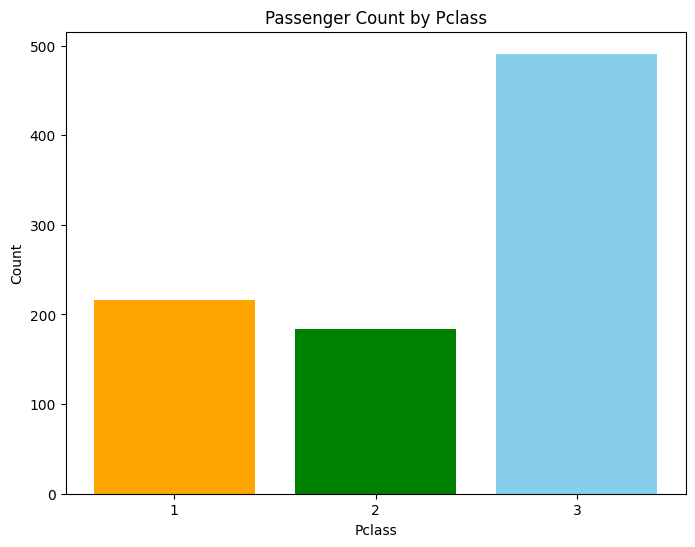

In [7]:
# Plot 1: Count of passengers by Pclass
plt.figure(figsize=(8, 6))
pclass_counts = train_df['Pclass'].value_counts()
plt.bar(pclass_counts.index, pclass_counts.values, color=['skyblue', 'orange', 'green'])
plt.title("Passenger Count by Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.xticks(pclass_counts.index)
plt.show()

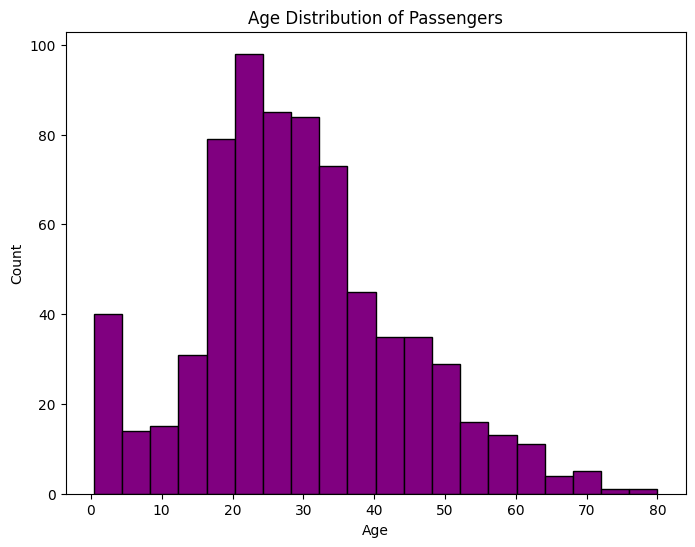

In [8]:
# Plot 2: Age distribution of passengers

plt.figure(figsize=(8, 6))
plt.hist(train_df['Age'].dropna(), bins=20, color='purple', edgecolor='black')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

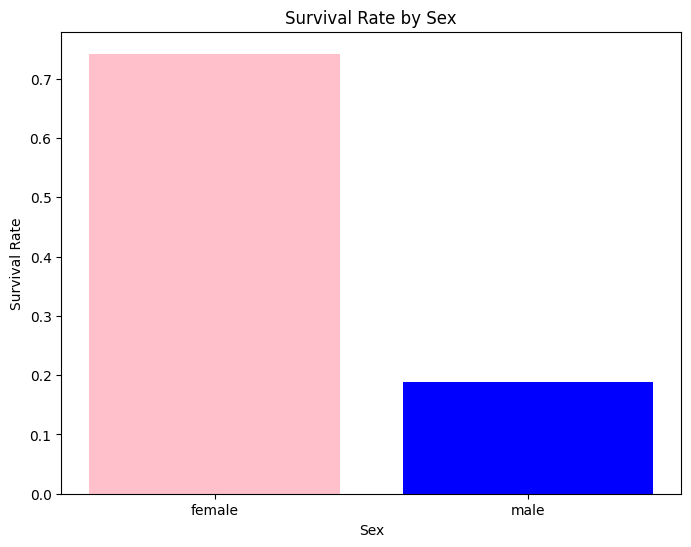

In [9]:
# Plot 3: Survival rate by Sex

plt.figure(figsize=(8, 6))
sex_survival = train_df.groupby('Sex')['Survived'].mean()
plt.bar(sex_survival.index, sex_survival.values, color=['pink', 'blue'])
plt.title("Survival Rate by Sex")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.show()


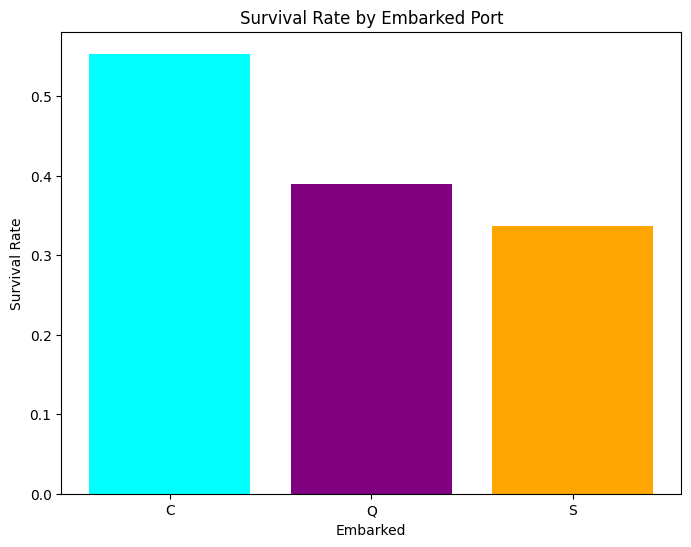

In [10]:
# Plot 4: Survival rate by Embarked port

plt.figure(figsize=(8, 6))
embarked_survival = train_df.groupby('Embarked')['Survived'].mean()
plt.bar(embarked_survival.index, embarked_survival.values, color=['cyan', 'purple', 'orange'])
plt.title("Survival Rate by Embarked Port")
plt.xlabel("Embarked")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.show()

<ipython-input-11-2ec5d0585ef9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


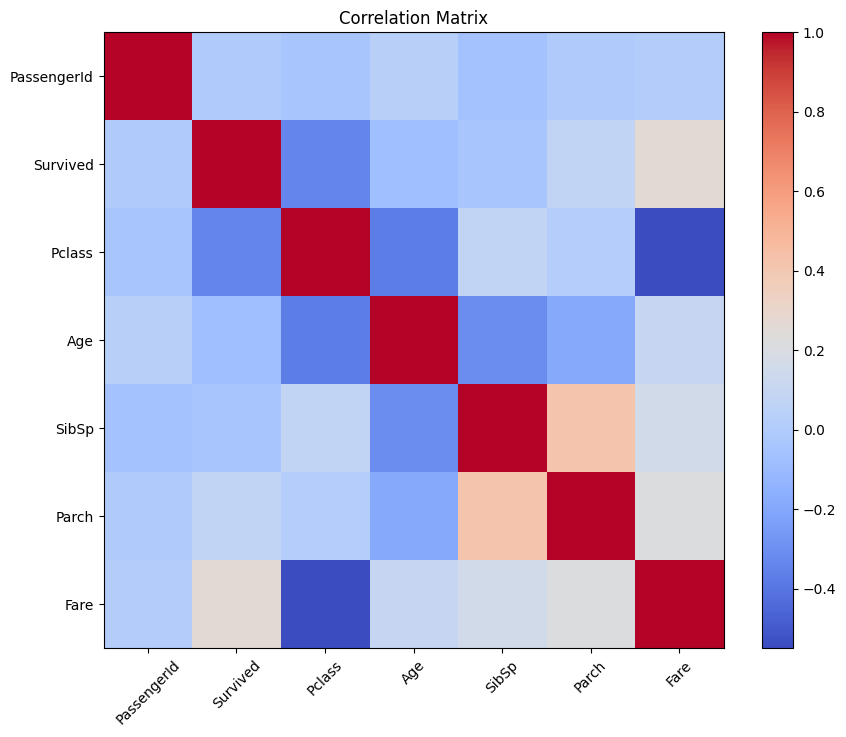

In [11]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix")
plt.show()

## Preprocess the data

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
train_df.drop("Name", axis=1, inplace=True)
train_df.drop("Cabin", axis=1, inplace=True)
train_df.drop("Ticket", axis=1, inplace=True)

In [14]:
mean_age = train_df['Age'].mean()
train_df['Age'].fillna(mean_age, inplace=True)

In [15]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
train_df.Embarked.fillna("S", inplace=True)

In [17]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
train_df = pd.get_dummies(train_df)

In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_female   891 non-null    uint8  
 8   Sex_male     891 non-null    uint8  
 9   Embarked_C   891 non-null    uint8  
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 53.2 KB


## Prepare for model

In [21]:
X = train_df.drop("Survived", axis=1)
y = train_df.Survived

In [22]:
# Import the train_test_split function from sklearn library
from sklearn.model_selection import train_test_split

# Create the training the testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
# Let's check the length of the training and testing datasets
len(X_train), len(y_train), len(X_test), len(y_test)

(712, 712, 179, 179)

In [24]:
# Import the model from the sklearn library
from sklearn.ensemble import RandomForestClassifier

# Assign the model to a variable
model = RandomForestClassifier()

# Train the model on the training dataset
model.fit(X_train, y_train)

# Let's check the score of the model
model.score(X_test, y_test)

0.8659217877094972

## Predict on test data

In [25]:
test_data = pd.read_csv("test.csv")

In [26]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [28]:
test_data.drop("Cabin", axis=1, inplace=True)
test_data.drop("Ticket", axis=1, inplace=True)
test_data.drop("Name", axis=1, inplace=True)

In [29]:
mean_age = test_data['Age'].mean()
test_data['Age'].fillna(mean_age, inplace=True)

In [30]:
mean_fare = test_data['Fare'].mean()
test_data['Fare'].fillna(mean_fare, inplace=True)

In [31]:
test_data = pd.get_dummies(test_data)

In [32]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Sex_female   418 non-null    uint8  
 7   Sex_male     418 non-null    uint8  
 8   Embarked_C   418 non-null    uint8  
 9   Embarked_Q   418 non-null    uint8  
 10  Embarked_S   418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 21.8 KB


In [33]:
predictions = model.predict(test_data)

In [34]:
ids = test_data.PassengerId

In [35]:
submission = pd.DataFrame({"PassengerId": ids,
                           "Survived":predictions})

In [36]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [37]:
submission["Survived"].value_counts()

0    288
1    130
Name: Survived, dtype: int64

In [38]:
submission.to_csv("submission.csv", index=False)

At this point we get a submission file that we can submit to kaggle